In [1]:
"""
This is Basic explination of Naive Bayes for Machine Learning. The Dataset i have used is called pima-indian-diabetes dataset
you can download the dataset from : https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.
Pregnancies: Number of times pregnant
Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
BloodPressure: Diastolic blood pressure (mm Hg)
SkinThickness: Triceps skin fold thickness (mm)
Insulin: 2-Hour serum insulin (mu U/ml)
BMI: Body mass index (weight in kg/(height in m)^2)
DiabetesPedigreeFunction: Diabetes pedigree function
Age: Age (years)
Outcome: Class variable (0 or 1)
"""

SyntaxError: invalid syntax (<ipython-input-1-996828c2b88a>, line 1)

In [2]:
# import dependencies
import numpy as np
import pandas as pd

# other dependencies that you might not need
# just for publishing image in notebook
from IPython.display import Image
from IPython.core.display import HTML 
%matplotlib  inline

In [9]:
# column has all the name of column name 
# our data is stored in dataframe: data

column = ["Pregnancies","Glucose","BloodPressure","SkinThickness","Insulin","BMI","DiabetesPedigreeFunction","Age","Outcome"]
data = pd.read_csv('6 - pima-indians-diabetes.data.csv',names=column)

In [10]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
# to recollect, this is our bayesian formula
Image(url= "images/bayes.PNG")

In [12]:

Where,

P(c|x) is the posterior probability of class c given predictor ( features).
P(c) is the probability of class.
P(x|c) is the likelihood which is the probability of predictor given class.
P(x) is the prior probability of predictor.

SyntaxError: invalid syntax (<ipython-input-12-1b3b721ad924>, line 3)

In [ ]:
In a bayes classifier, we calculate the posterior for every class for each observation. Then, classify the observation based on the class with the largest posterior value. we have two classes of outcome So we will calculate two posteriors: one for Outcome 1 and one for Outcome 0.
specifically we will be using Gaussian Naive Bayes Classifier

In [13]:
# now in data we have target data in Outcome column
# outcome column has two sets namely Outcome 1 and outcome 0
# now to calculate naive bayesian of outcome1 the formula will be

Image(url= "images/outcome1.PNG")

# Now let us unpack the top equation a bit:
P(Outcome1)is the prior probabilities. It is, as you can see, simply the probability an observation is "1" . This is just the number of person of outcome1 in the dataset divided by the total number of people in the dataset.


p(pregnancies∣outcome1) p(Glucose∣Outcome1) p(Blood Pressure∣Outcome1)... is the likelihood. Notice that we have unpacked person’s data. so it is now every feature in the dataset. The “gaussian” and “naive” come from two assumptions present in this likelihood:


If you look each term in the likelihood you will notice that we assume each feature is uncorrelated from each other. That is, Pregnancies is independent of Glucose or BMI etc.. This is obviously not true, and is a “naive” assumption - hence the name “naive bayes.”


------------------------------------------------------------------------------------------------------------------------------------------------------------------
as the formula our goal is divided into 5 types
Calculate Priors
Calculate Likelihood
Calculate Marginal Probability
Apply Bayes Classifier To New Data Point
understand what has just happen
1.Calculate Priors
Priors can be either constants or probability distributions. In our example, this is simply the probability of outcome of patients

In [14]:
# Number of patients of outcome 1
n_outcome1 = data['Outcome'][data['Outcome'] == 1].count()

# Number of patients of outcome 0
n_outcome0 = data['Outcome'][data['Outcome'] == 0].count()

# Total people
total_ppl = data['Outcome'].count()

In [15]:
# Number of people of outcome1 divided by the total people
P_outcome1 = n_outcome1/total_ppl

# Number of people of outcome0 divided by the total people
P_outcome0 = n_outcome0/total_ppl

In [16]:
Image(url= "images/bay1.PNG")

In [17]:
# Now first calculate the means of the data according to outcome

# Group the data by gender and calculate the means of each feature
data_means = data.groupby('Outcome').mean()

# View the values
data_means

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


In [18]:
# Second calculate the variance of the data according to outcome

# Group the data by gender and calculate the variance of each feature
data_variance = data.groupby('Outcome').var()

# View the values
data_variance

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,9.103403,683.362325,326.274693,221.710525,9774.345427,59.133870,0.089452,136.134168
1,13.996870,1020.139457,461.897968,312.572195,19234.673319,52.750693,0.138648,120.302588


In [25]:
# Means for outcome1 for all features
outcome1_Pregnancies_mean = data_means['Pregnancies'][data_variance.index == 1].values[0]
outcome1_Glucose_mean = data_means['Glucose'][data_variance.index == 1].values[0]
outcome1_BloodPressure_mean = data_means['BloodPressure'][data_variance.index == 1].values[0]
outcome1_SkinThickness_mean = data_means['SkinThickness'][data_variance.index == 1].values[0]
outcome1_Insulin_mean = data_means['Insulin'][data_variance.index == 1].values[0]
outcome1_BMI_mean = data_means['BMI'][data_variance.index == 1].values[0]
outcome1_DiabetesPedigreeFunction_mean = data_means['DiabetesPedigreeFunction'][data_variance.index == 1].values[0]
outcome1_Age_mean = data_means['Age'][data_variance.index == 1].values[0]


# Variance for outcome1 for all features
outcome1_Pregnancies_variance = data_variance['Pregnancies'][data_variance.index == 1].values[0]
outcome1_Glucose_variance= data_variance['Glucose'][data_variance.index == 1].values[0]
outcome1_BloodPressure_variance = data_variance['BloodPressure'][data_variance.index == 1].values[0]
outcome1_SkinThickness_variance = data_variance['SkinThickness'][data_variance.index == 1].values[0]
outcome1_Insulin_variance = data_variance['Insulin'][data_variance.index == 1].values[0]
outcome1_BMI_variance = data_variance['BMI'][data_variance.index == 1].values[0]
outcome1_DiabetesPedigreeFunction_variance = data_variance['DiabetesPedigreeFunction'][data_variance.index == 1].values[0]
outcome1_Age_variance = data_variance['Age'][data_variance.index == 1].values[0]

# Means for outcome0 for all features
outcome0_Pregnancies_mean = data_means['Pregnancies'][data_variance.index == 0].values[0]
outcome0_Glucose_mean = data_means['Glucose'][data_variance.index == 0].values[0]
outcome0_BloodPressure_mean = data_means['BloodPressure'][data_variance.index == 0].values[0]
outcome0_SkinThickness_mean = data_means['SkinThickness'][data_variance.index == 0].values[0]
outcome0_Insulin_mean = data_means['Insulin'][data_variance.index == 0].values[0]
outcome0_BMI_mean = data_means['BMI'][data_variance.index == 0].values[0]
outcome0_DiabetesPedigreeFunction_mean = data_means['DiabetesPedigreeFunction'][data_variance.index == 0].values[0]
outcome0_Age_mean = data_means['Age'][data_variance.index == 0].values[0]

# Variance for outcomeo for all features
outcome0_Pregnancies_variance = data_variance['Pregnancies'][data_variance.index == 0].values[0]
outcome0_Glucose_variance = data_variance['Glucose'][data_variance.index == 0].values[0]
outcome0_BloodPressure_variance = data_variance['BloodPressure'][data_variance.index == 0].values[0]
outcome0_SkinThickness_variance = data_variance['SkinThickness'][data_variance.index == 0].values[0]
outcome0_Insulin_variance = data_variance['Insulin'][data_variance.index == 0].values[0]
outcome0_BMI_variance = data_variance['BMI'][data_variance.index == 0].values[0]
outcome0_DiabetesPedigreeFunction_variance = data_variance['DiabetesPedigreeFunction'][data_variance.index == 0].values[0]
outcome0_Age_variance = data_variance['Age'][data_variance.index == 0].values[0]

In [26]:
outcome1_Pregnancies_mean

4.865671641791045

In [ ]:
3.Marginal probability
It is probably one of the most confusing parts of bayesian approaches. In some examples it is completely possible to calculate the marginal probability.
However, in many real-world cases, it is either extremely difficult or impossible to find the value of the marginal probability (explaining why is beyond the scope of this tutorial).
This is not as much of a problem for our classifier as you might think. Why? Because we don’t care what the true posterior value is, we only care which class has a the highest posterior value.
And because the marginal probability is the same for all classes
1) we can ignore the denominator

2) calculate only the posterior’s numerator for each class

3) pick the largest numerator. That is, we can ignore the posterior’s denominator and make a prediction solely on the relative values of the posterior’s numerator.

4. Apply Bayes Classifier To New Data Point

In [27]:
# Create an empty dataframe that we have to predict 
person = pd.DataFrame()

# Create some feature values for this single row
person['Pregnancies'] = [7]
person['Glucose'] = [130]
person['BloodPressure'] = [86]
person['SkinThickness'] = [34]
person['Insulin'] = [0]
person['BMI'] = [33.5]
person['DiabetesPedigreeFunction'] = [0.564]
person['Age'] = [50]
# View the data 
person

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,7,130,86,34,0,33.5,0.564,50


In [28]:
# Create a function that calculates p(x | y):
def p_x_given_y(x, mean_y, variance_y):

    # Input the arguments into a probability density function
    p = 1/(np.sqrt(2*np.pi*variance_y)) * np.exp((-(x-mean_y)**2)/(2*variance_y))
    
    # return p
    return p

In [29]:
#formula again for reference
Image(url= "images/bayes.PNG")

# Where,
#      P(c|x) is the posterior probability of class c given predictor ( features).
#      P(c) is the probability of class.
#      P(x|c) is the likelihood which is the probability of predictor given class.
#      P(x) is the prior probability of predictor.

In [30]:
# So for now we will only calculate the numerator of the data and will predict based on numerator only

# Numerator of the posterior probability if the unclassified observation is a Outcome1
d_out1 = P_outcome1 * \
p_x_given_y(person['Pregnancies'][0], outcome1_Pregnancies_mean, outcome1_Pregnancies_variance) * \
p_x_given_y(person['Glucose'][0], outcome1_Glucose_mean, outcome1_Glucose_variance) * \
p_x_given_y(person['BloodPressure'][0], outcome1_BloodPressure_mean, outcome1_BloodPressure_variance) * \
p_x_given_y(person['SkinThickness'][0], outcome1_SkinThickness_mean, outcome1_SkinThickness_variance) * \
p_x_given_y(person['Insulin'][0], outcome1_Insulin_mean, outcome1_Insulin_variance) * \
p_x_given_y(person['BMI'][0], outcome1_BMI_mean, outcome1_BMI_variance) * \
p_x_given_y(person['DiabetesPedigreeFunction'][0], outcome1_DiabetesPedigreeFunction_mean, outcome1_DiabetesPedigreeFunction_variance) *\
p_x_given_y(person['Age'][0], outcome1_Age_mean, outcome1_Age_variance)

In [31]:
d_out1

2.2311606712297407e-13

In [32]:
# Numerator of the posterior probability if the unclassified observation is a Outcome0
d_out2 = P_outcome0 * \
p_x_given_y(person['Pregnancies'][0], outcome0_Pregnancies_mean, outcome0_Pregnancies_variance) * \
p_x_given_y(person['Glucose'][0], outcome0_Glucose_mean, outcome0_Glucose_variance) * \
p_x_given_y(person['BloodPressure'][0], outcome0_BloodPressure_mean, outcome0_BloodPressure_variance) * \
p_x_given_y(person['SkinThickness'][0], outcome0_SkinThickness_mean, outcome0_SkinThickness_variance) * \
p_x_given_y(person['Insulin'][0], outcome0_Insulin_mean, outcome0_Insulin_variance) * \
p_x_given_y(person['BMI'][0], outcome0_BMI_mean, outcome0_BMI_variance) * \
p_x_given_y(person['DiabetesPedigreeFunction'][0], outcome0_DiabetesPedigreeFunction_mean, outcome0_DiabetesPedigreeFunction_variance) *\
p_x_given_y(person['Age'][0], outcome0_Age_mean, outcome0_Age_variance)

In [33]:
d_out2

1.7904471741735295e-13

In [ ]:
5. understand what has just happen
now as we compare this value with outcome1 and outcome0, we can definitely say that the given data that we inserted is infact of type outcome1




This is just a very simple way of nderstanding the Naive bayes from scratch. This technique was adapated from here.https://chrisalbon.com/machine_learning/naive_bayes/naive_bayes_classifier_from_scratch/

Further i will implement this same technique in scikit learn,
This is easy and you should use this only when you understand the upper code
-------------------------------------------------------------------------------------------------------------
implementing Naive bayes using Scikit learn
now there are three types of naive bayes in scikit learn
Multinomial. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

Bernoulli. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html

and finally Gaussian. http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

## a quick reminder, we hve implemented gaussian naive bayesian in the above code

In [34]:
#first visualise what we have in our hand
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [35]:
X = data.iloc[:,0:-1] # X is the features in our dataset
y = data.iloc[:,-1]   # y is the Labels in our dataset

In [36]:
# divide the dataset in train test using scikit learn
# now the model will train in training dataset and then we will use test dataset to predict its accuracy

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
# now preparing our model as per Gaussian Naive Bayesian

from sklearn.naive_bayes import GaussianNB

model = GaussianNB().fit(X_train, y_train) #fitting our model

In [38]:
predicted_y = model.predict(X_test) #now predicting our model to our test dataset

In [39]:
from sklearn.metrics import accuracy_score

# now calculating that how much accurate our model is with comparing our predicted values and y_test values
accuracy_score = accuracy_score(y_test, predicted_y) 
print (accuracy_score)

0.7362204724409449


In [40]:
# the data is stored in Datadrame person
predicted_y = model.predict(person)

In [41]:
print (predicted_y)

[1]


In [42]:
# Multinomial Naive Bayes
from sklearn.datasets import fetch_20newsgroups

data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [43]:
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

In [44]:
print(train.data[5])

From: dmcgee@uluhe.soest.hawaii.edu (Don McGee)
Subject: Federal Hearing
Originator: dmcgee@uluhe
Organization: School of Ocean and Earth Science and Technology
Distribution: usa
Lines: 10


Fact or rumor....?  Madalyn Murray O'Hare an atheist who eliminated the
use of the bible reading and prayer in public schools 15 years ago is now
going to appear before the FCC with a petition to stop the reading of the
Gospel on the airways of America.  And she is also campaigning to remove
Christmas programs, songs, etc from the public schools.  If it is true
then mail to Federal Communications Commission 1919 H Street Washington DC
20054 expressing your opposition to her request.  Reference Petition number

2493.



In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline

model = make_pipeline(TfidfVectorizer(), MultinomialNB())

In [46]:
model.fit(train.data, train.target)
labels = model.predict(test.data)

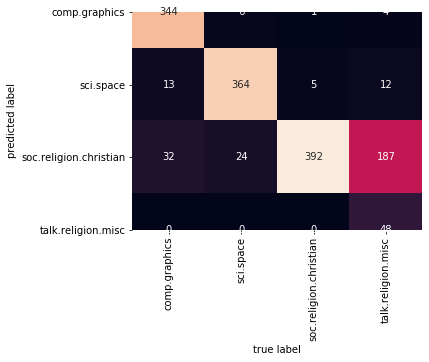

In [50]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

In [51]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

In [52]:
predict_category('sending a payload to the ISS')

'sci.space'

In [53]:
predict_category('determining the screen resolution')

'comp.graphics'